In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

In [224]:
df = pd.read_csv('perceptron_dataset.csv')
#min_max_scaler = preprocessing.MinMaxScaler() normalizace nepoužívat je to pak moc rychlé :D
#arr_df = min_max_scaler.fit_transform(df)
arr_df = np.array(df)
headers = ['Temperature','light','CO2','Occupancy']

In [225]:
arr_X = np.delete(arr_df,-1,-1)
arr_Y = arr_df[:,-1]

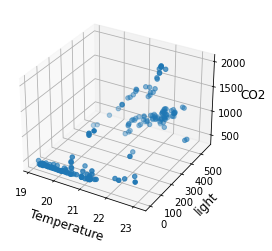

In [226]:
x,y,z = arr_X[:,0],arr_X[:,1],arr_X[:,-1]
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,cmap='inferno')
ax.set_xlabel(headers[0],fontsize=12)
ax.set_ylabel(headers[1],fontsize=12)
ax.set_zlabel(headers[2],fontsize=12)
plt.show()

In [227]:
x_train, x_test, y_train, y_test = train_test_split(arr_X, arr_Y)

In [228]:
class Perceptron_class:
    
    def __init__(self,wei,n_ep=1000):
        self.n_ep = n_ep
        self.b = 1
        self.c = 10
        self.wei = wei
        self.ACT_fx = self._ACT_fx
        self.ACT_wei = self._ACT_wei
    
    def _ACT_fx(self,arr_xi,row):
        ACT_res = (self.wei[0]*self.b) + np.sum(self.wei[1:]*arr_xi[row])
        return ACT_res

    def _ACT_wei(self,Ep_score,arr_xi,row):
        self.wei = self.wei + (self.c *(Ep_score)*np.insert(arr_xi[row],0,1))
        return self.wei

    def fit(self,arr_xi,arr_yi):
        Ep_scRS = [ ]
        for epoch in range(self.n_ep):
            k = 0
            arr_xi, arr_yi = shuffle(arr_xi,arr_yi)

            for row, ele in enumerate(arr_xi):
                ACT_res = self.ACT_fx(arr_xi,row)
                ACT_res = np.where(ACT_res>=0,1,0)
                Ep_score = arr_yi[row]-ACT_res
                self.wei = self.ACT_wei(Ep_score,arr_xi,row)
                k += abs(Ep_score) 
            Ep_scRS.append(k)
        return Ep_scRS, arr_xi
            
    def predict(self,arr_xi,arr_yi):
        res = [ ]
        for row,ele in enumerate(arr_xi):
            ACT_res = self.ACT_fx(arr_xi,row)
            ACT_res = np.where(ACT_res>=0,1,0)
            res.append(ACT_res)
        return res

In [229]:
vahy = np.array([0,0,0,0])

In [230]:
model = Perceptron_class(vahy,2000)

In [231]:
a = model.fit(x_train,y_train)

In [232]:
b = model.predict(x_test,y_test)

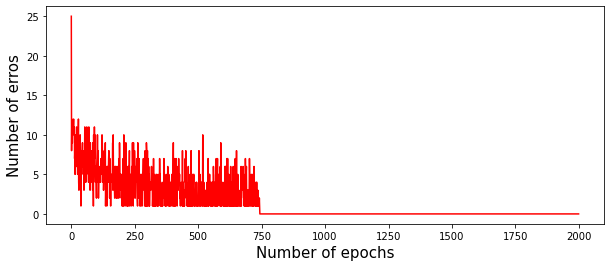

In [234]:
fig = plt.figure(figsize =(10, 4))
plt.plot(a[0],color = 'red')
plt.ylabel(ylabel='Number of erros',size = 15)
plt.xlabel(xlabel='Number of epochs',size = 15)
plt.show()

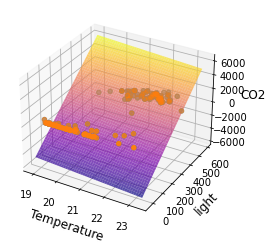

In [235]:
x_data_test = a[1]
wie_score_test = model.wei

x,y,z = x_data_test[:,0],x_data_test[:,1],x_data_test[:,-1]
ax = plt.axes(projection='3d')
ax.set_xlabel(headers[0],fontsize=12)
ax.set_ylabel(headers[1],fontsize=12)
ax.set_zlabel(headers[2],fontsize=12)
ax.scatter3D(x,y,z,cmap='inferno')
a1,b1,c1,d1 = wie_score_test[1],wie_score_test[2],wie_score_test[3],wie_score_test[0]
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x1 = np.linspace(x_min,x_max)
y1 = np.linspace(y_min,y_max)
Xs,Ys = np.meshgrid(x1,y1)
Zs = (d1-a1*Xs-b1*Ys)/c1
ax.scatter3D(x,y,z,cmap='inferno')
ax.plot_surface(Xs,Ys,Zs,alpha = 0.7,cmap='plasma')
plt.show()